Dataset = https://www.kaggle.com/datasets/huynhminh24/weatheraus

**Problem Statement**

Build a model to predict if it will rain tomorrow using past weather data lik(temperature, humidity, wind, pressure, and cloud cover) from various locations in Australia.

**Feature Descriptions:**

* **`Date, Location`** → When and where the weather was recorded.
* **`MinTemp, MaxTemp, Temp 9am, Temp3pm`** → Temperature readings                (°C).

* **`Rainfall, Evaporation, Sunshine`** → Rain and sun conditions.
* **`WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm`** → Wind details.
* **`Humidity 9am, Humidity 3pm`** → Morning and afternoon humidity (%).
* **`Pressure 9am, Pressure 3pm`** → Atmospheric pressure (hPa).
* **`Cloud9am, Cloud 3pm`** → Cloud cover (in eighths).
* **`RainToday`** → Did it rain today (Yes/No).


**`Target Variable:`**

RainTomorrow (Object: Yes/No) → Indicates whether it will rain the next day.

# Basic understanding

In [ ]:
import pandas as pd
df = pd.read_csv('/content/18-weatherAUS[1].csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
print(df.duplicated().sum())

0


# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
categorical_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

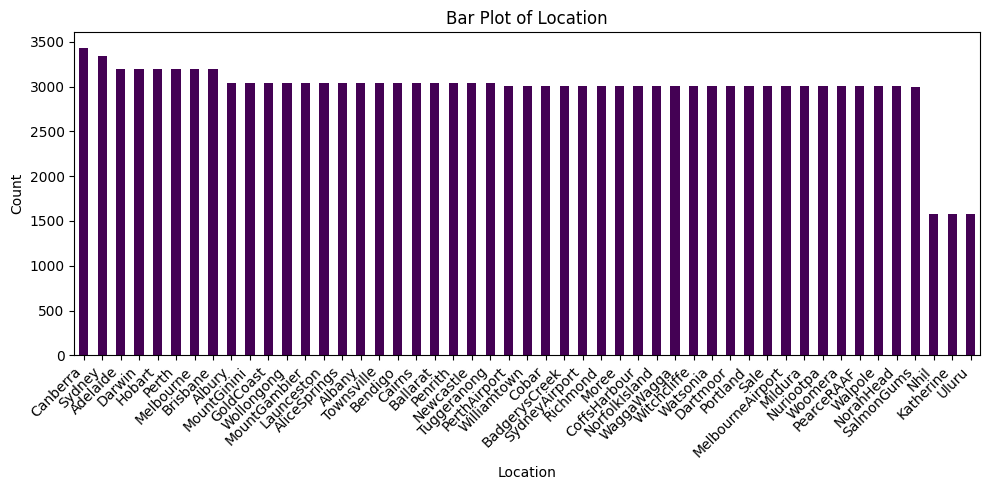

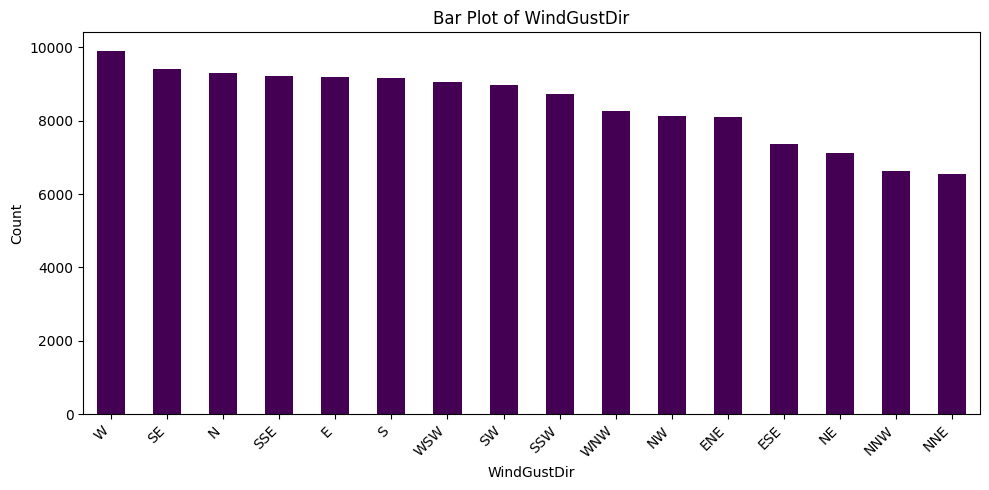

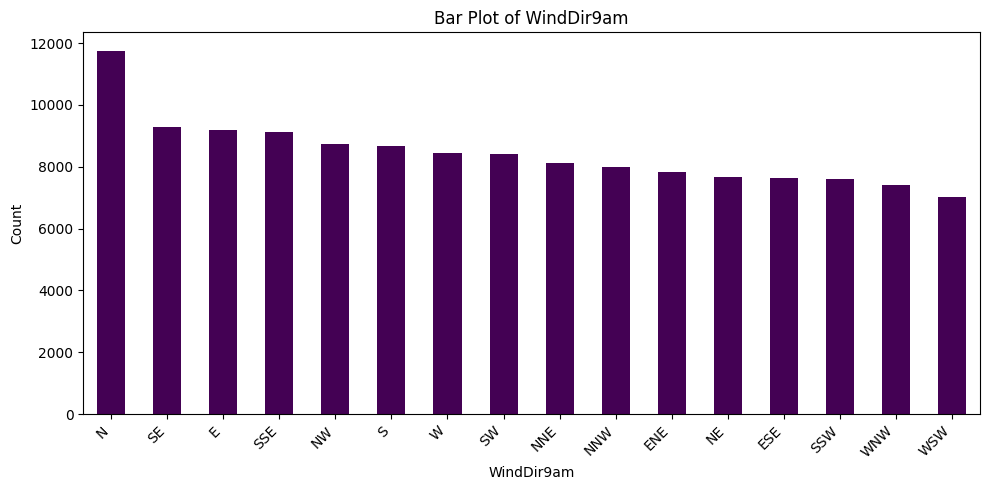

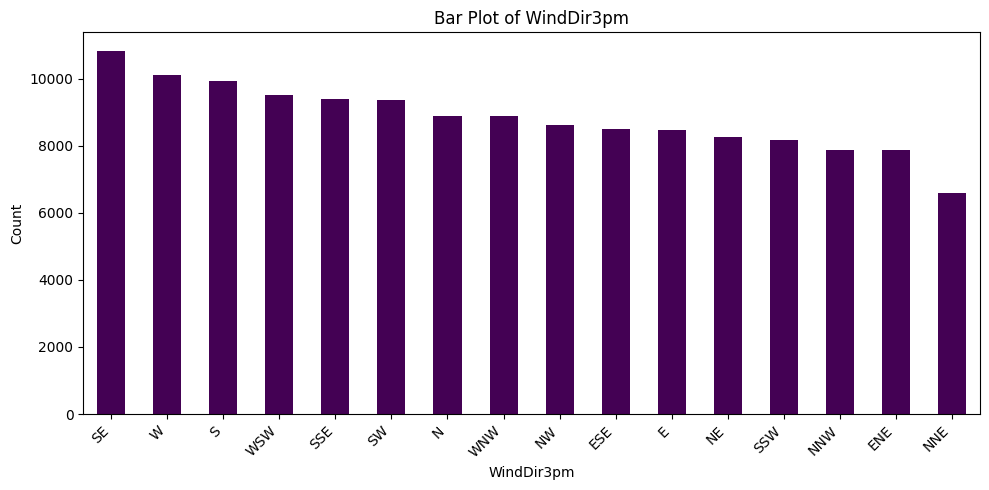

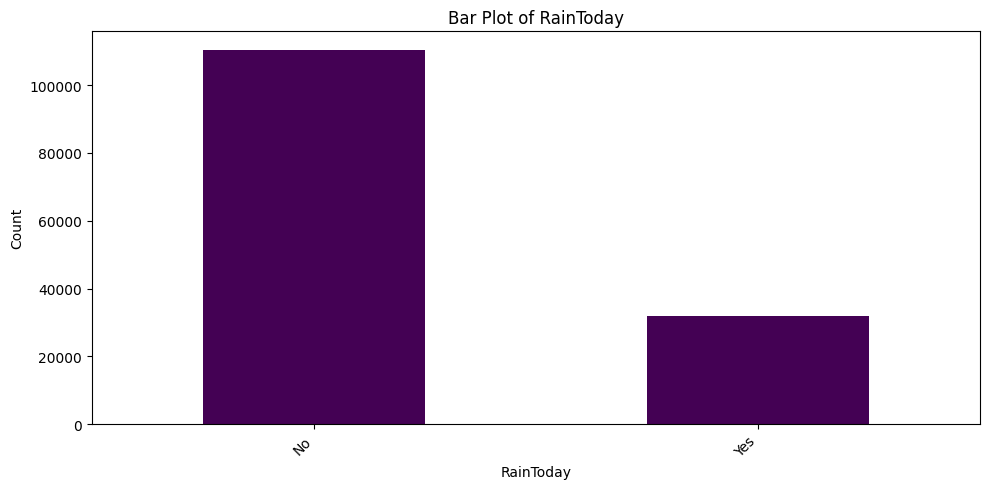

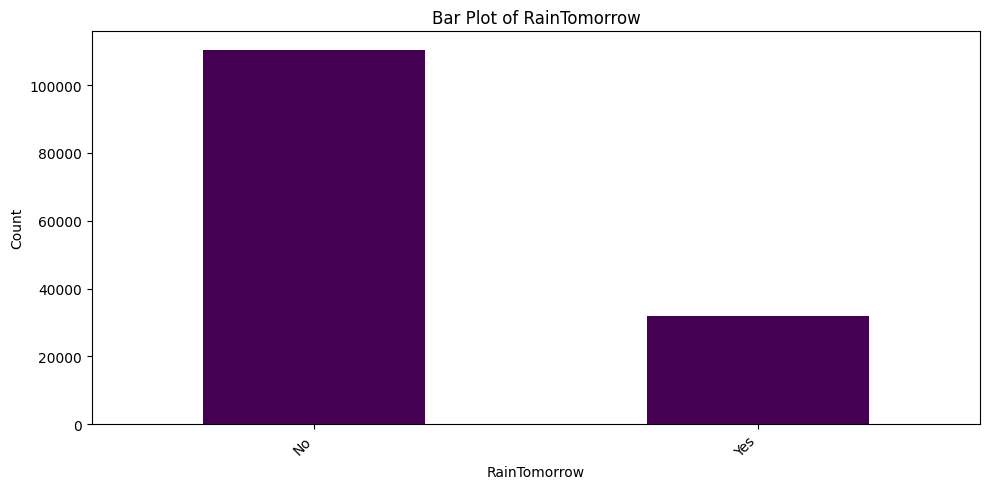

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(10, 5))
  df[col].value_counts().plot(kind='bar', colormap='viridis')
  plt.title(f"Bar Plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha="right")
  plt.tight_layout()
  plt.show()

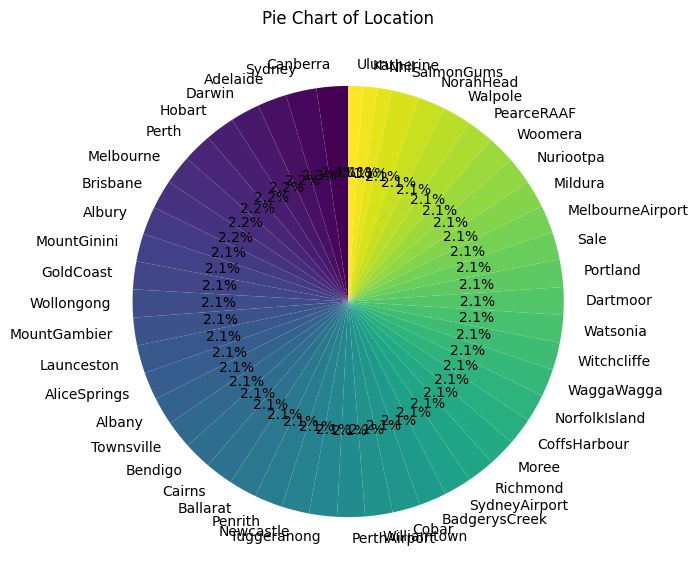

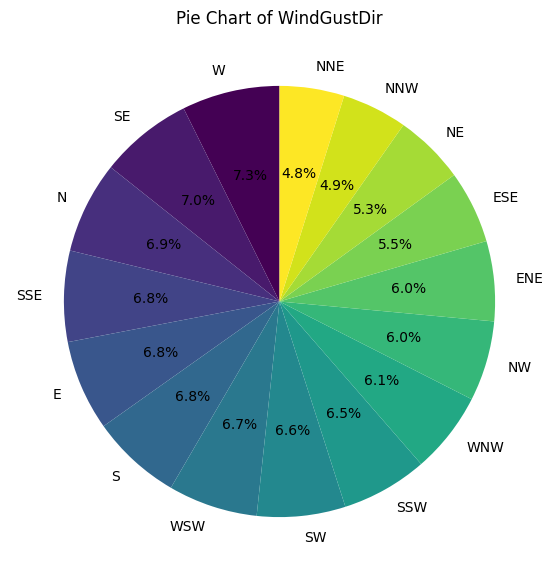

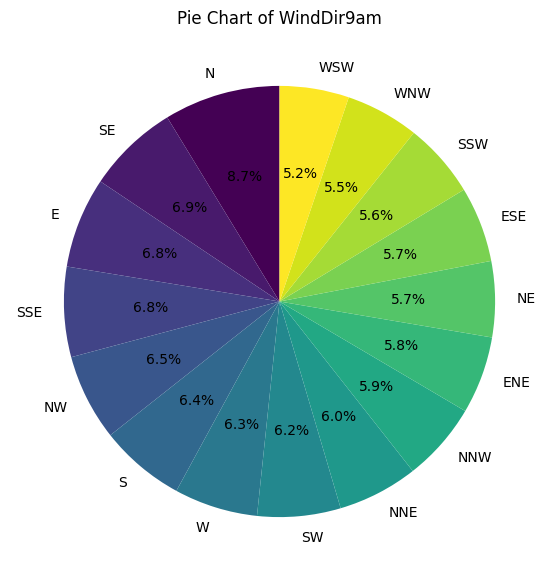

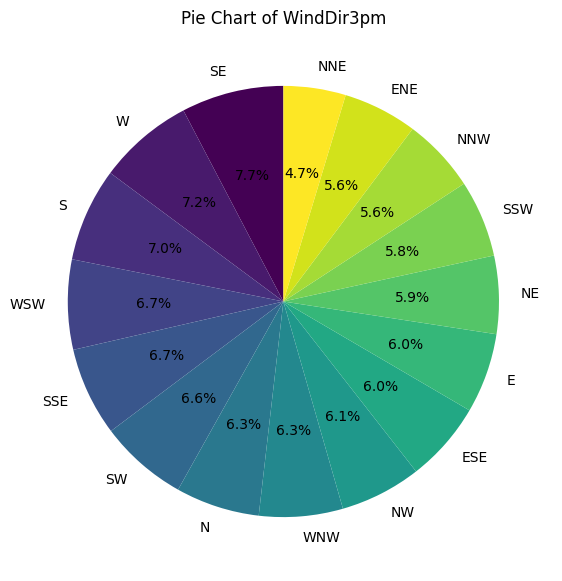

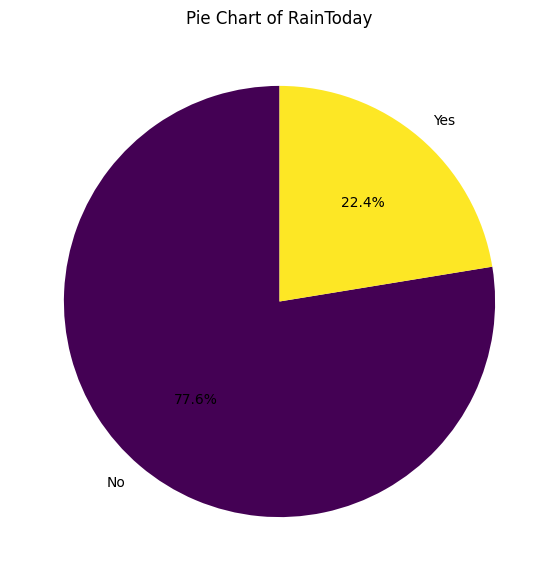

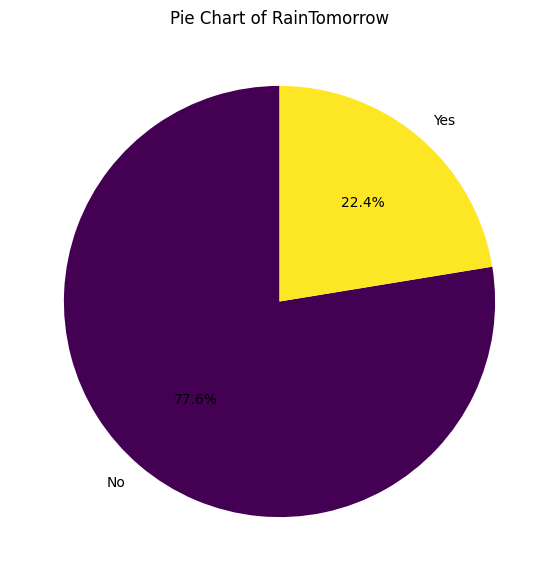

In [ ]:
for col in categorical_cols:

  plt.figure(figsize=(7, 7))
  df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
  plt.title(f"Pie Chart of {col}")
  plt.ylabel("")
  plt.show()

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


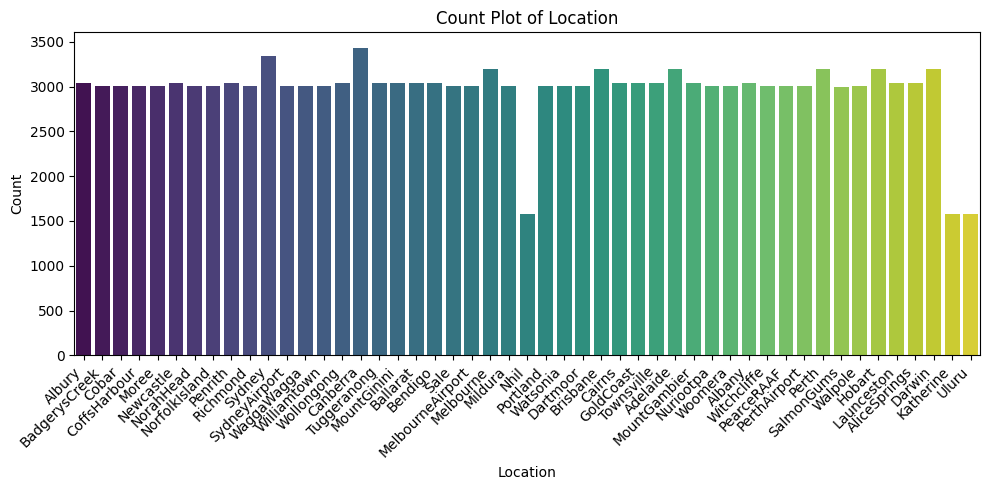

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


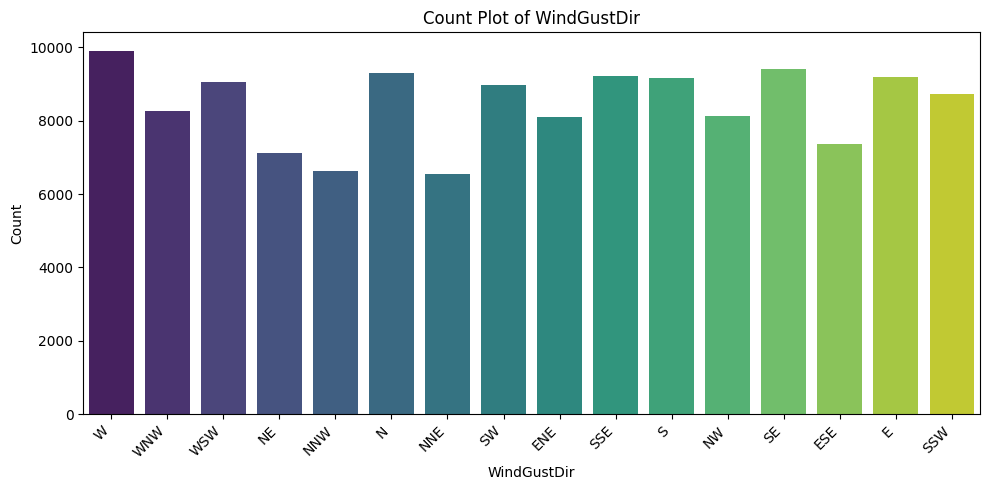

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


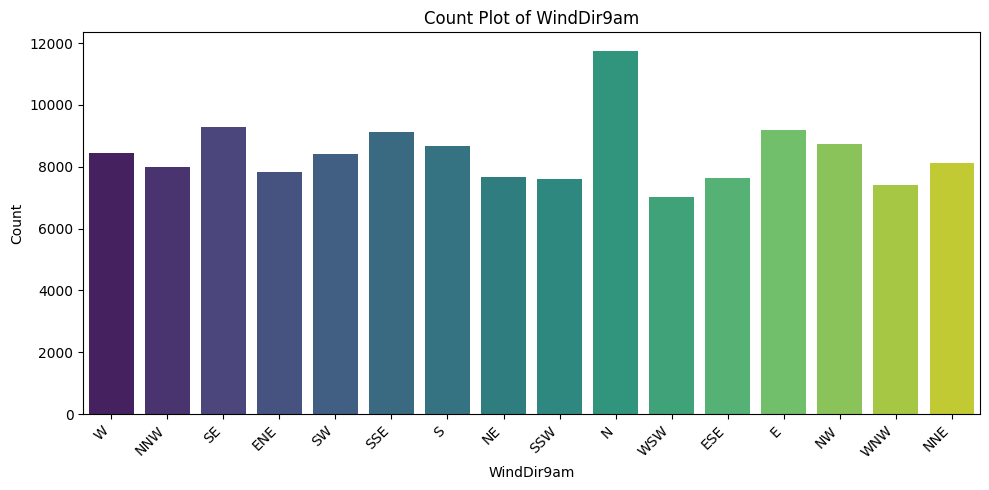

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


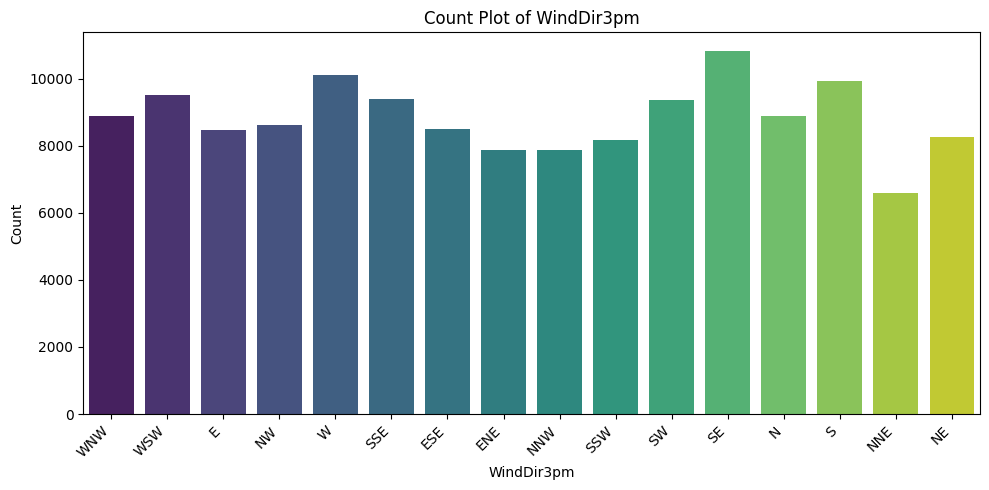

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


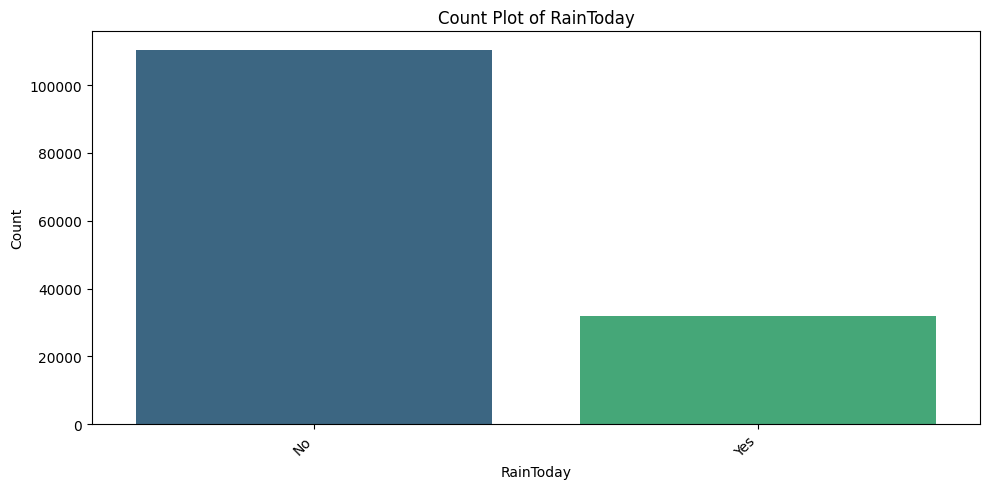

<ipython-input-13-3c272f078539>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


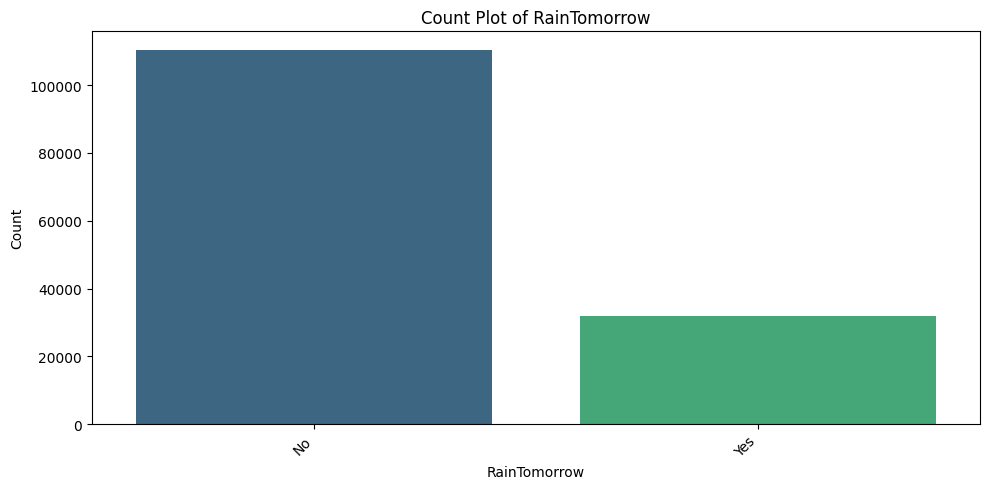

In [ ]:
for col in categorical_cols:

  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, data=df, palette="viridis")
  plt.title(f"Count Plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha="right")
  plt.tight_layout()
  plt.show()

In [ ]:
cols = df.select_dtypes(include='float64').columns

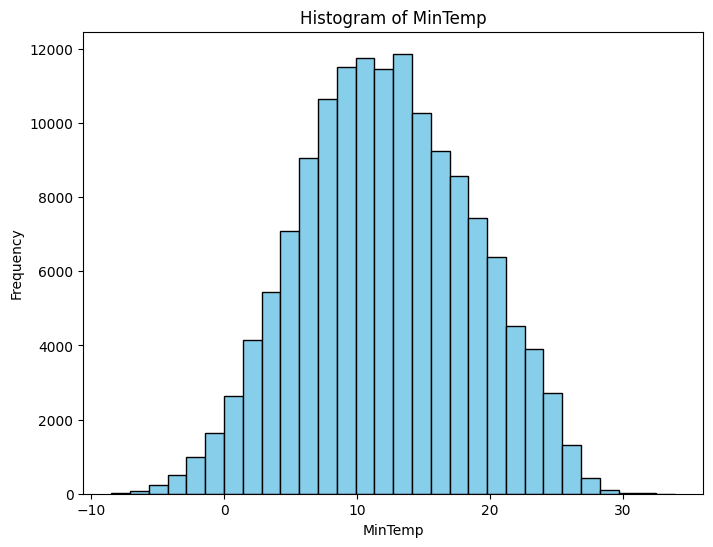

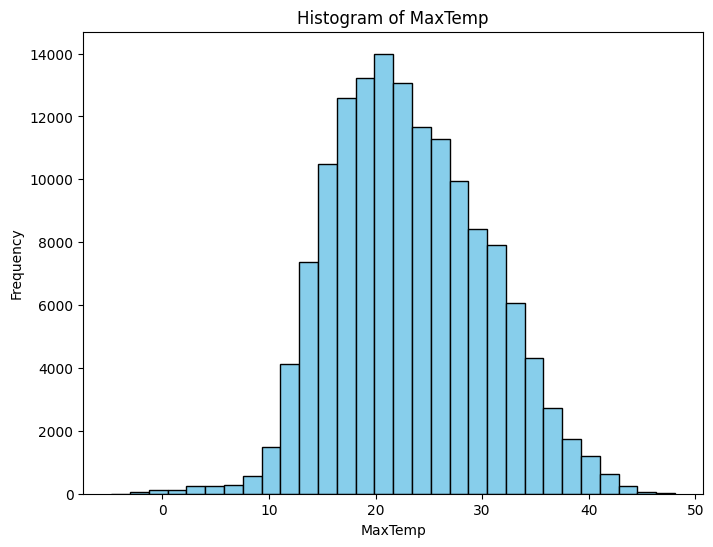

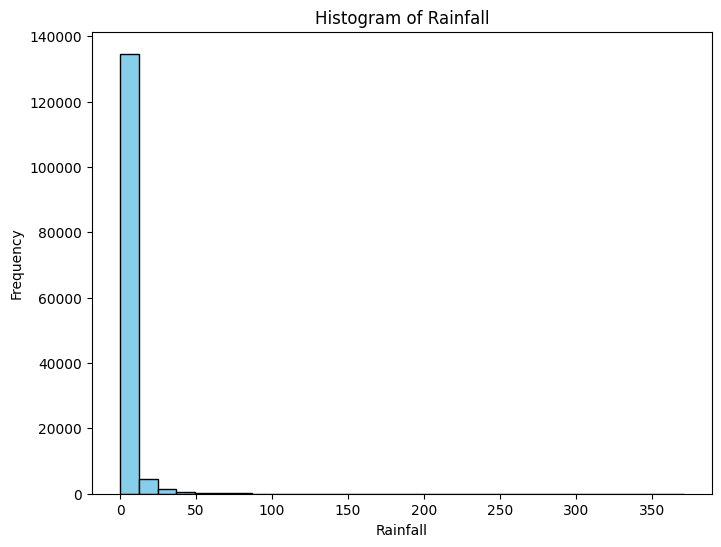

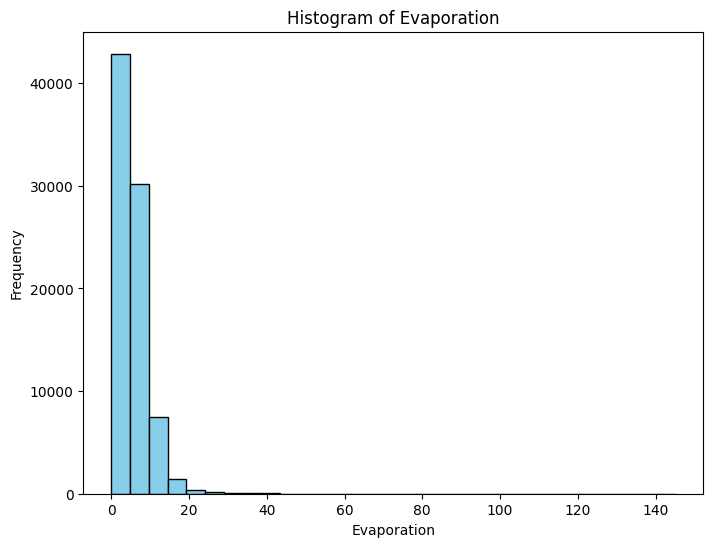

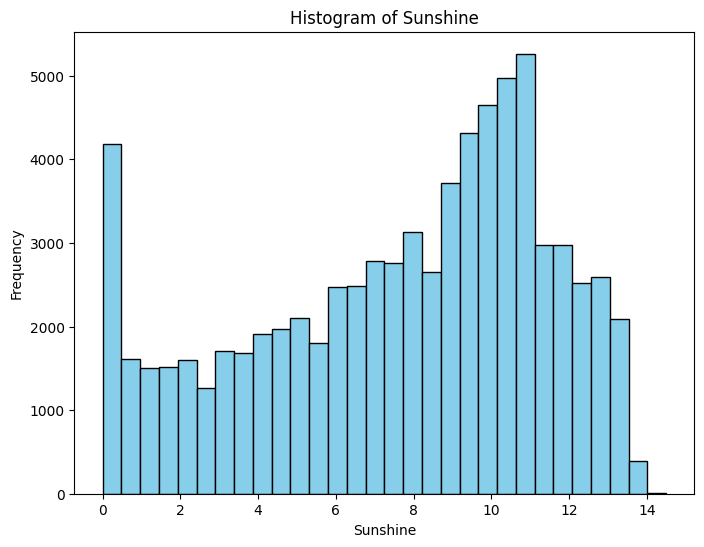

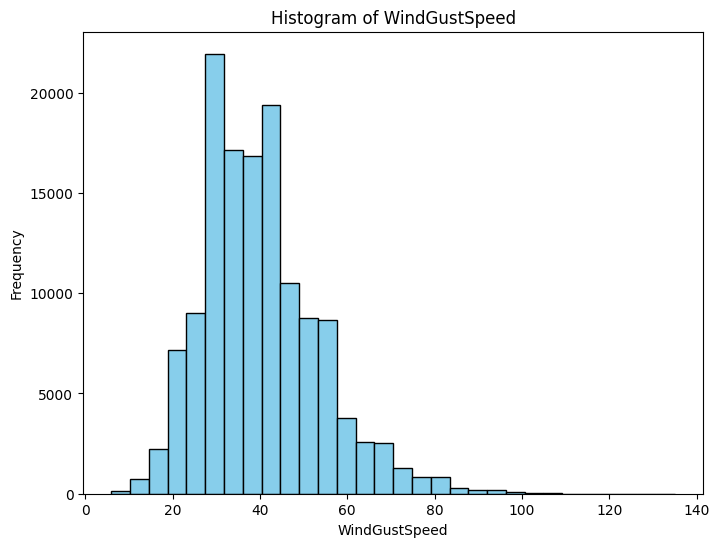

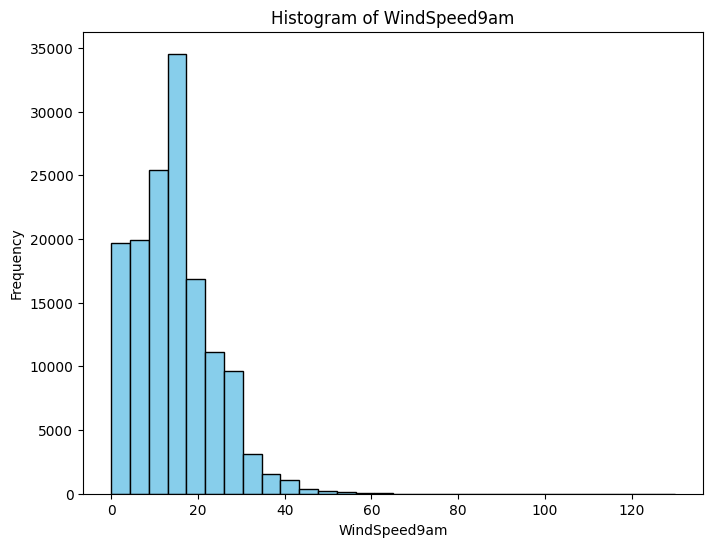

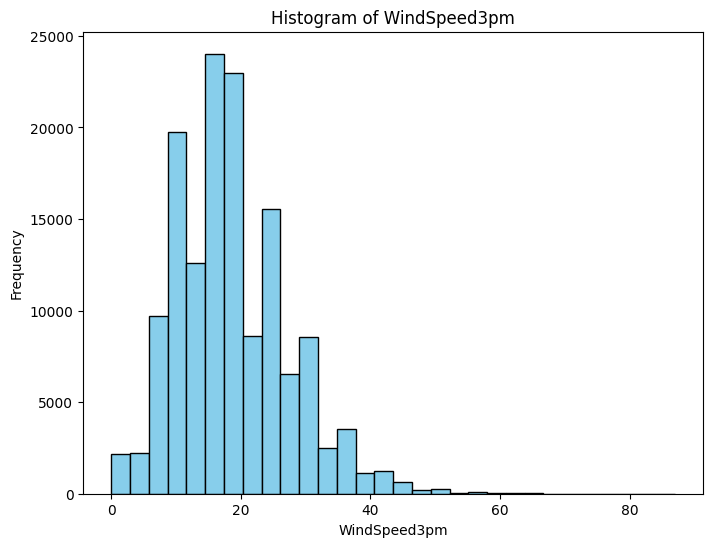

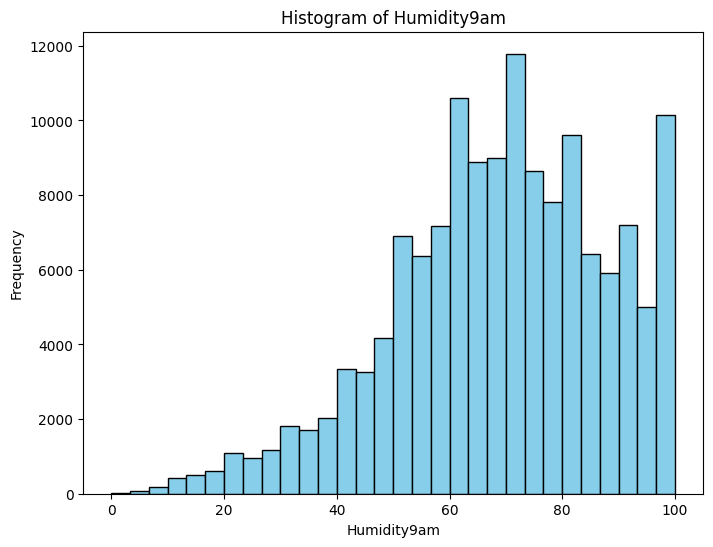

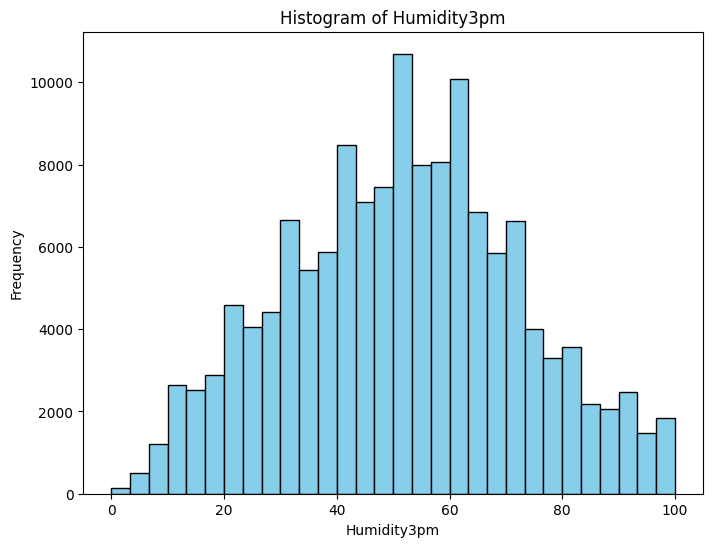

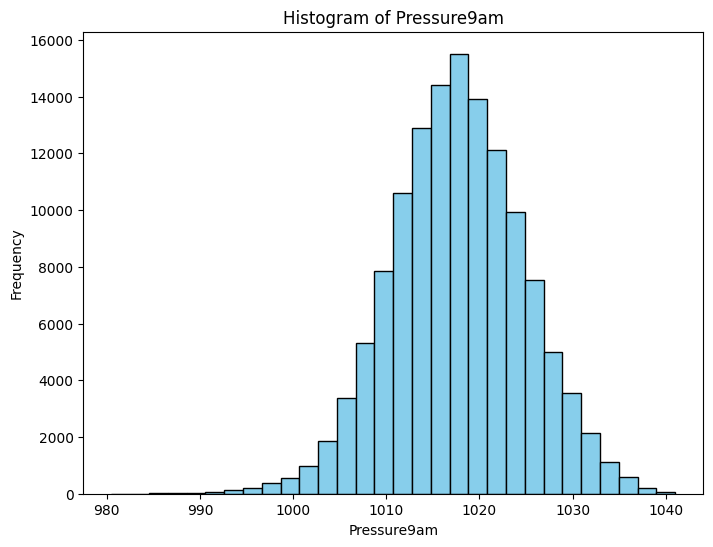

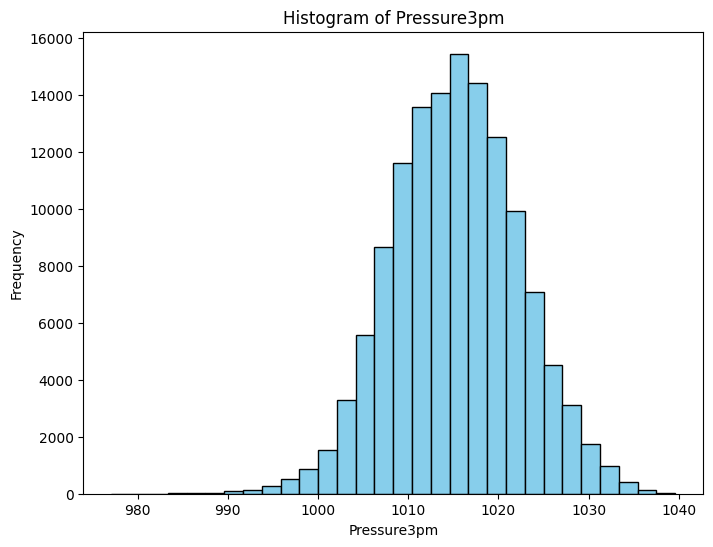

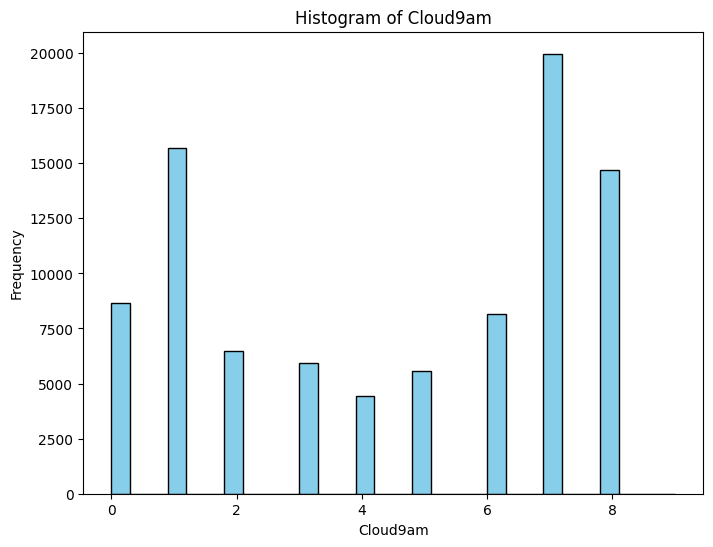

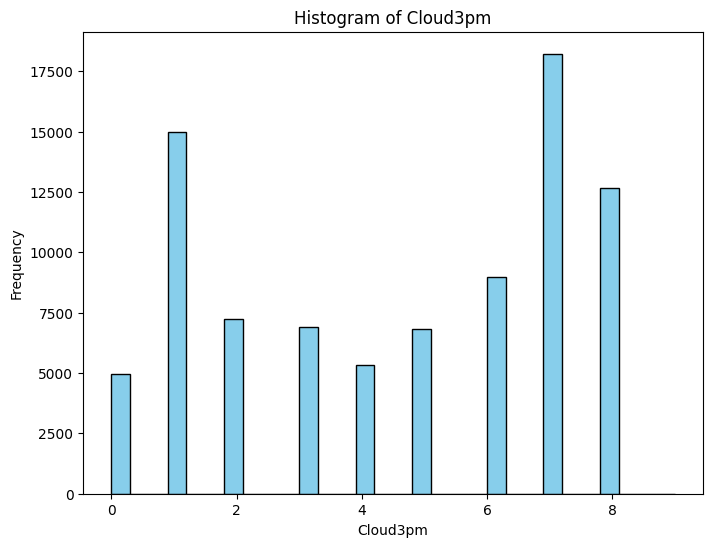

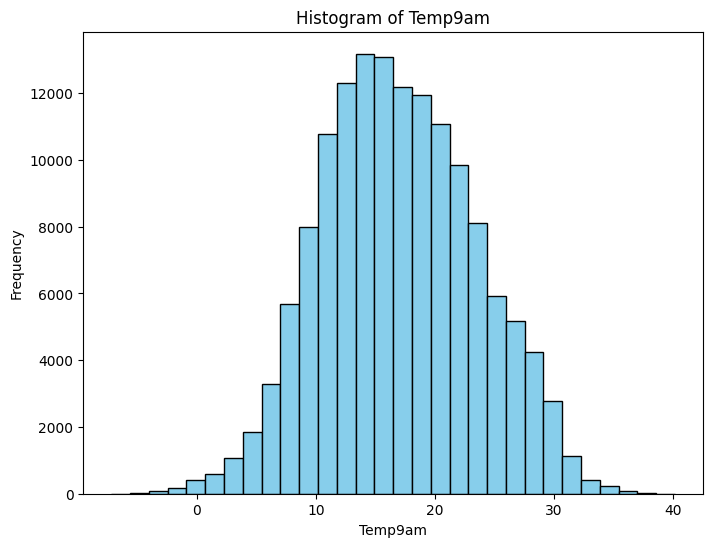

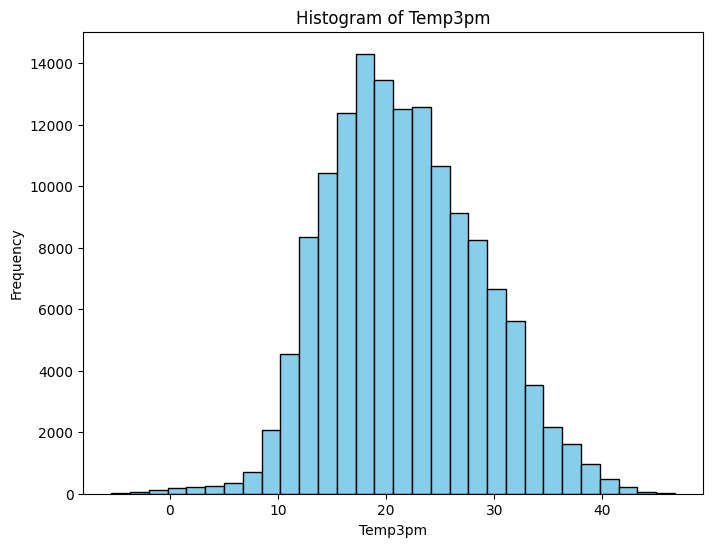

In [ ]:
for col in cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

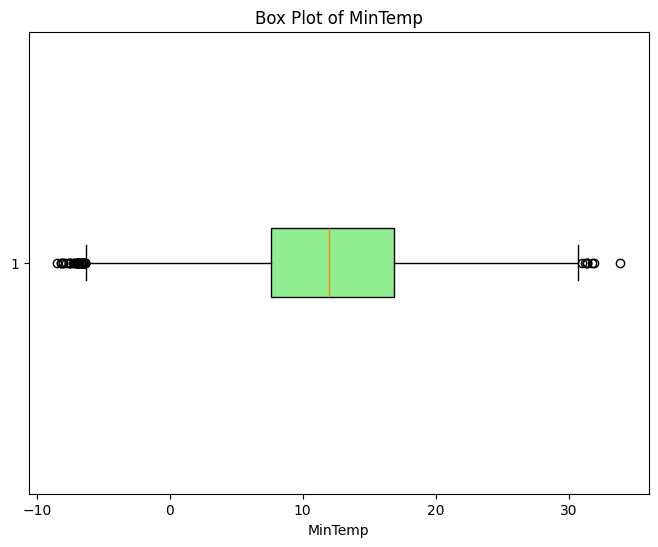

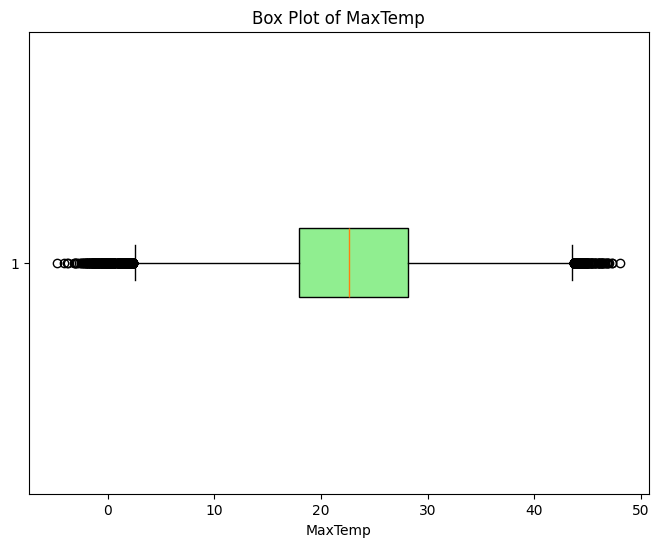

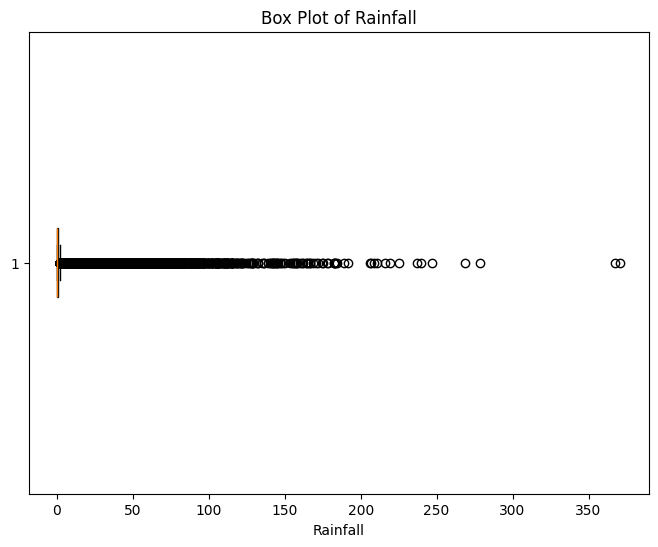

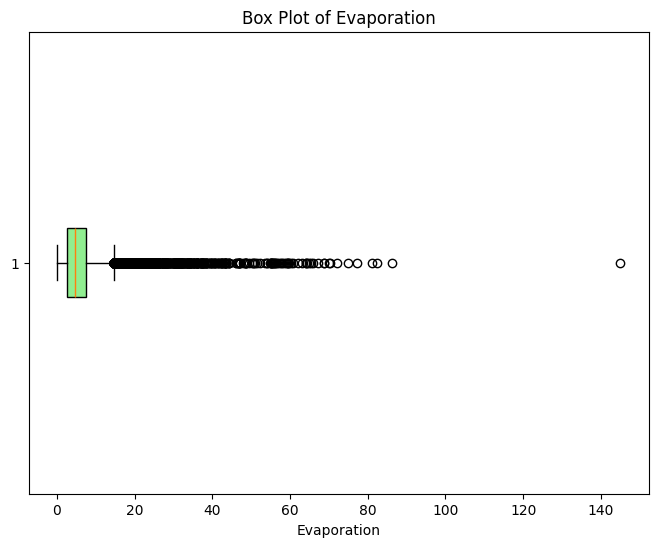

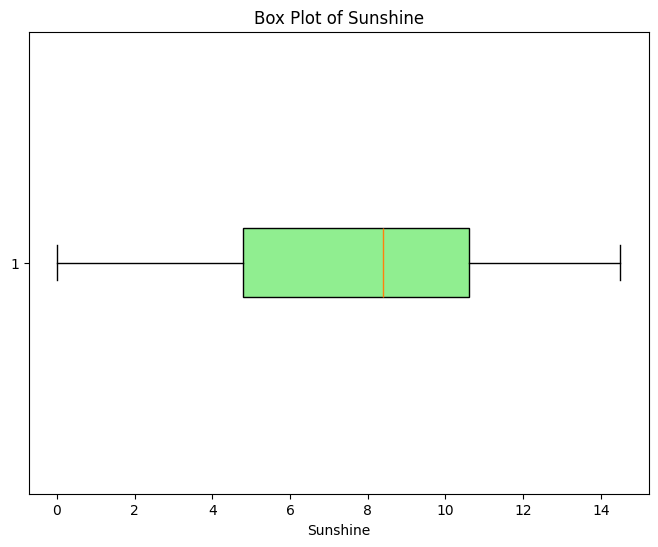

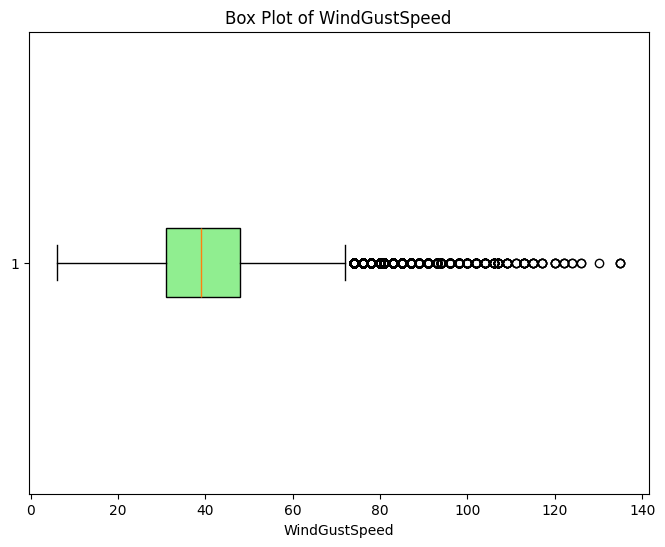

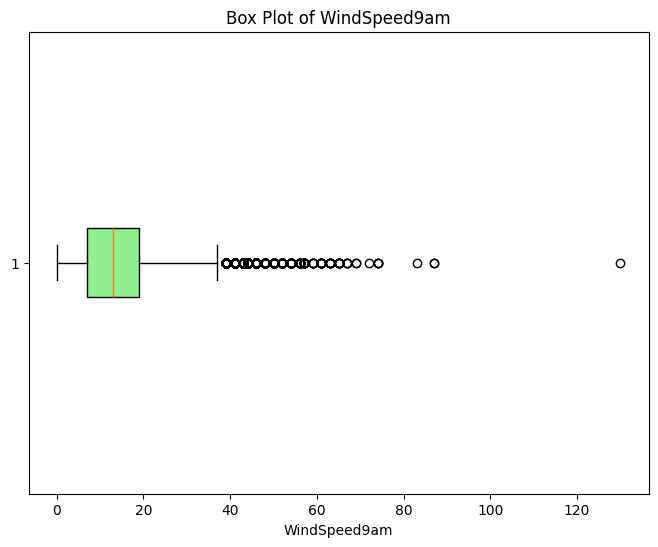

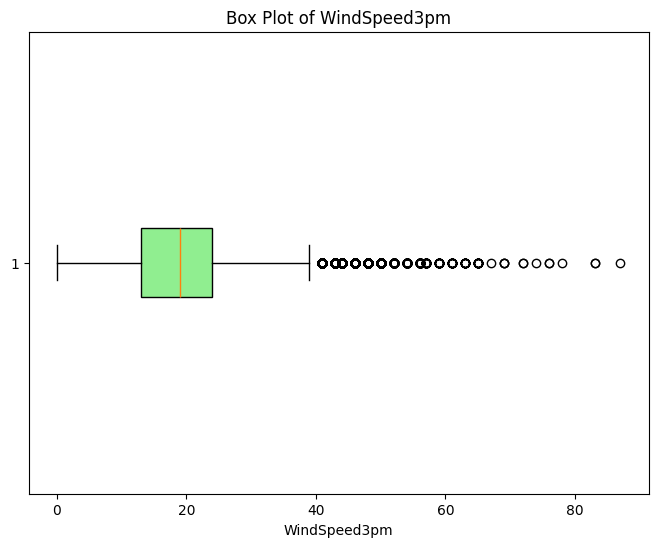

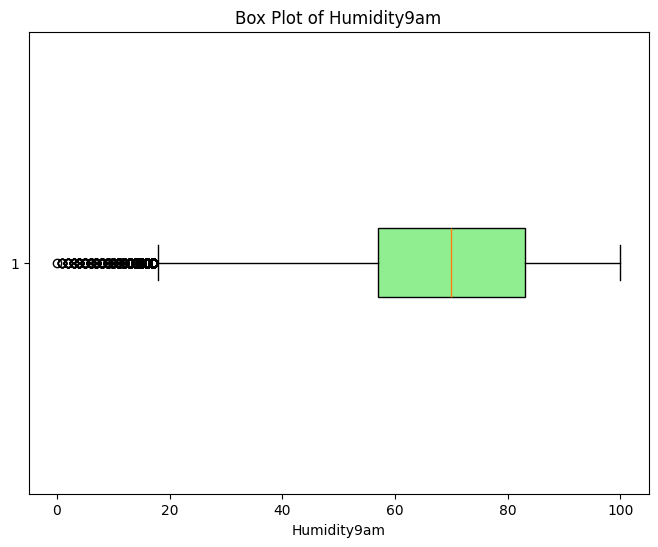

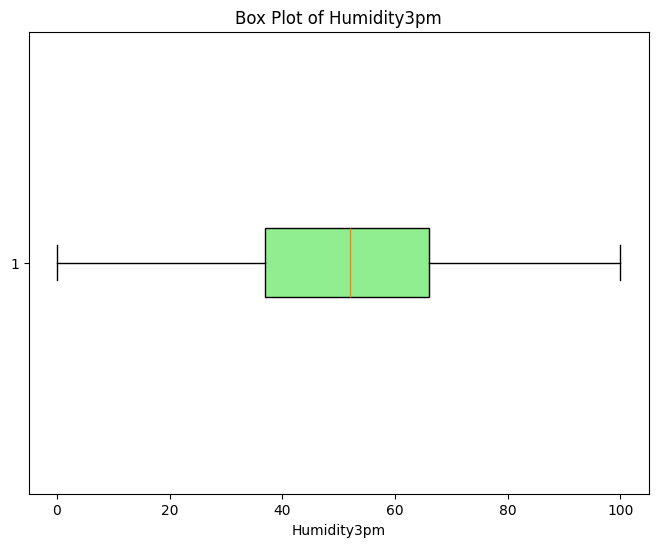

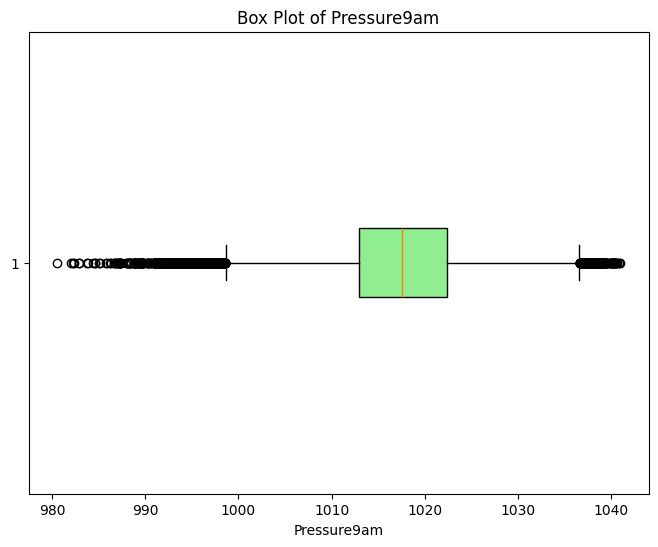

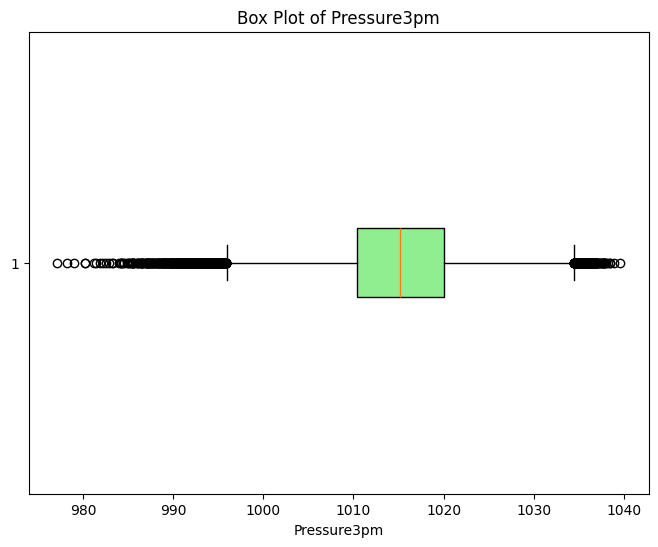

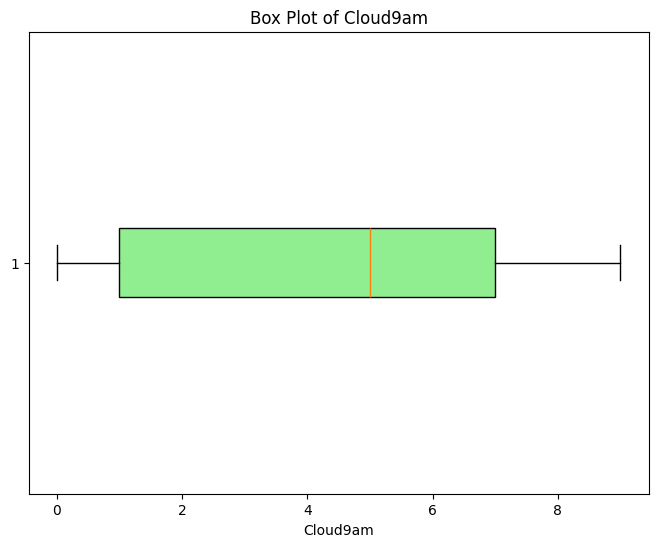

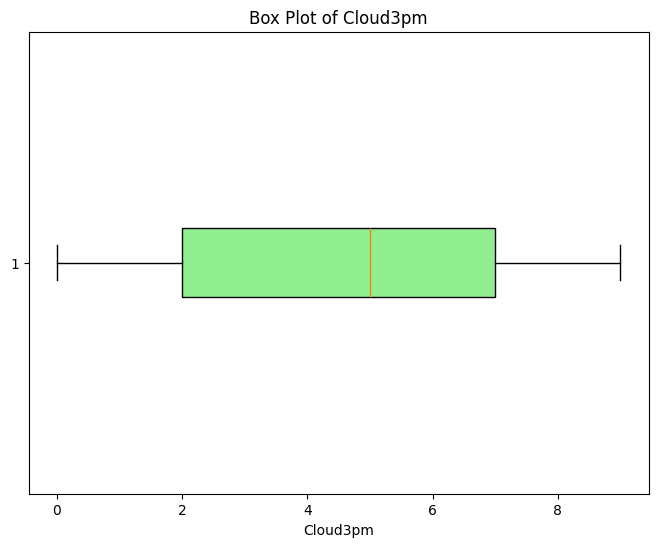

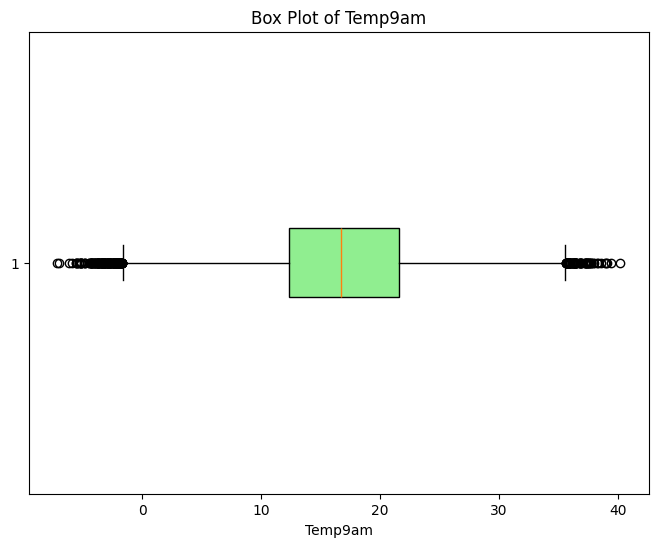

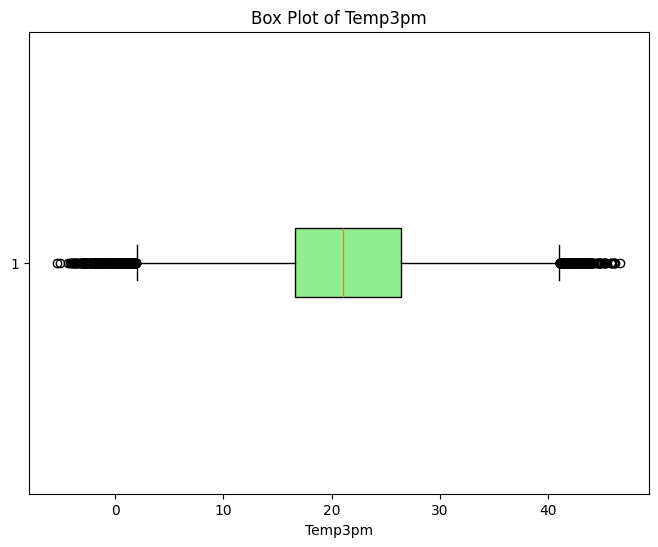

In [ ]:
for col in cols:

    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
dfs = df.select_dtypes(include=['number'])

In [ ]:
correlation_matrix = dfs.corr()

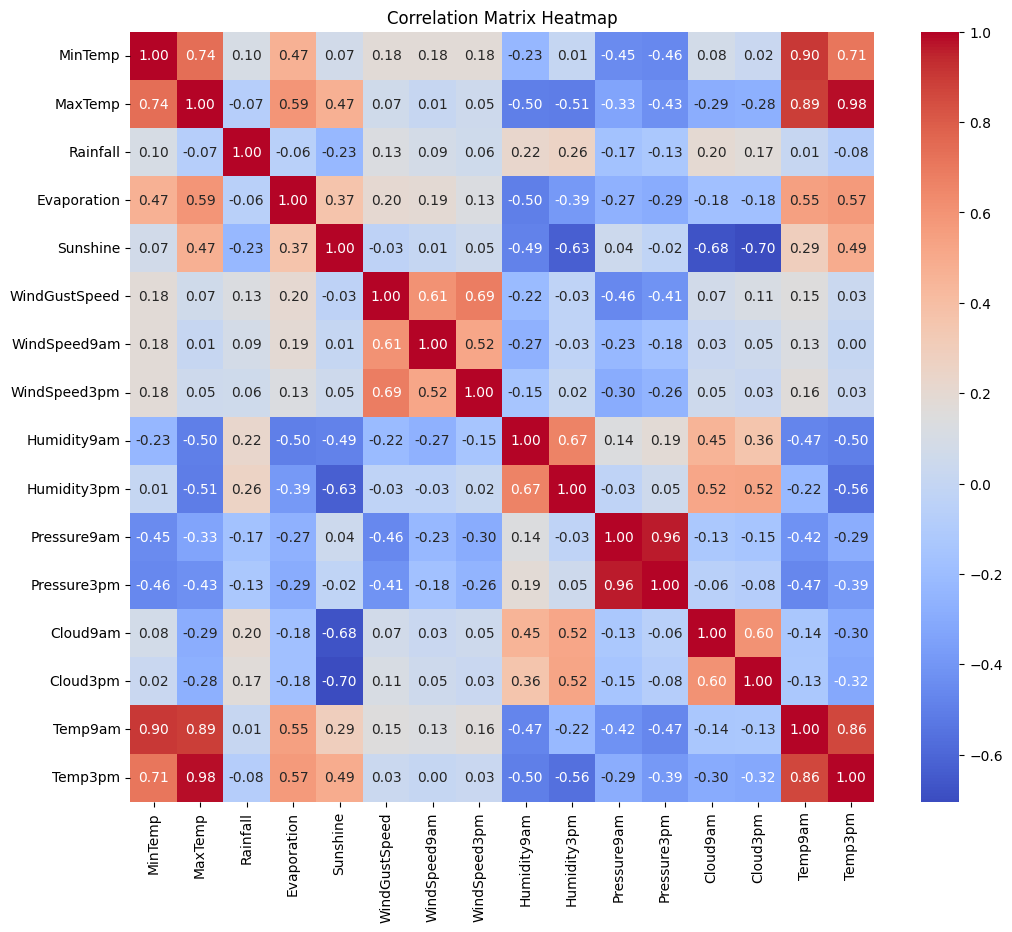

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Cleaning

In [ ]:
# there is no null values
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


In [ ]:
# there is many null values
df.drop(['Sunshine','Evaporation','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [ ]:
 #Fill with Mean (Normally Distributed Numerical Columns)
mean_cols = ["MinTemp", "MaxTemp", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Temp9am", "Temp3pm"]
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-26-bcc3e01a8710>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
#  Fill with Median (Skewed Numerical Columns)
median_cols = ["Rainfall", "WindGustSpeed", "Pressure9am", "Pressure3pm"]
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-27-1affae2105d4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
#Fill with Mode (Categorical Columns)
categorical_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-28-fae76f1ca6ad>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8336,2015-07-05,Cobar,1.8,15.0,0.0,E,17.0,E,NNW,13.0,9.0,63.0,31.0,1023.1,1019.9,7.1,14.2,No,No
122384,2013-07-10,Perth,9.3,20.4,34.6,WNW,20.0,NE,N,7.0,7.0,98.0,56.0,1017.6,1014.5,11.3,19.4,Yes,No
65244,2011-12-20,MelbourneAirport,11.2,22.1,0.0,S,39.0,SW,S,20.0,26.0,76.0,56.0,1017.0,1017.1,15.7,20.4,No,No
102506,2017-05-10,MountGambier,0.7,17.3,0.0,NNW,26.0,N,NNW,15.0,11.0,92.0,65.0,1026.5,1023.7,9.1,16.7,No,No
22053,2011-08-23,NorfolkIsland,14.6,17.7,51.8,E,65.0,E,ENE,33.0,33.0,90.0,81.0,1029.0,1027.4,16.0,17.0,Yes,Yes
127422,2010-08-14,Walpole,10.2,13.9,3.2,WNW,30.0,WNW,WNW,6.0,17.0,73.0,61.0,1020.1,1019.9,11.1,13.4,Yes,No
135742,2016-08-01,Launceston,2.5,12.3,0.0,NNW,24.0,E,NW,4.0,13.0,97.0,94.0,1017.6,1015.2,5.4,12.2,No,Yes
92041,2014-02-03,GoldCoast,21.0,28.6,1.0,ESE,54.0,SE,ESE,28.0,28.0,65.0,57.0,1014.0,1012.8,25.2,26.9,No,No
107459,2014-06-10,Woomera,4.4,18.5,0.0,NNE,46.0,ENE,NNE,15.0,26.0,55.0,34.0,1026.5,1022.0,10.6,17.8,No,No
22607,2013-04-27,NorfolkIsland,16.9,22.1,0.0,ESE,26.0,SE,SE,11.0,15.0,65.0,60.0,1022.4,1021.1,20.8,21.5,No,No


## Encoding

In [ ]:
df.shape

(145460, 19)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
print(df["Date"].dtype)

datetime64[ns]


In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
df.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical wind direction features
wind_features = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm']
le = LabelEncoder()
for col in wind_features:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  int64         
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  int64         
 8   WindDir3pm     145460 non-null  int64         
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.900000,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.100000,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.700000,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.000000,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.300000,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.400000,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.300000,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.900000,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,2017-06-24,41,7.8,27.000000,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


# Data Transformation

## Skewness


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(df[numeric_cols].skew())

Location         0.015406
MinTemp          0.021297
MaxTemp          0.221803
Rainfall         9.940909
WindGustDir     -0.233645
WindGustSpeed    0.923588
WindDir9am       0.174355
WindDir3pm      -0.117402
WindSpeed9am     0.782396
WindSpeed3pm     0.634934
Humidity9am     -0.488445
Humidity3pm      0.034148
Pressure9am     -0.098584
Pressure3pm     -0.045578
Temp9am          0.089083
Temp3pm          0.240968
RainToday        1.357739
RainTomorrow     1.357885
dtype: float64


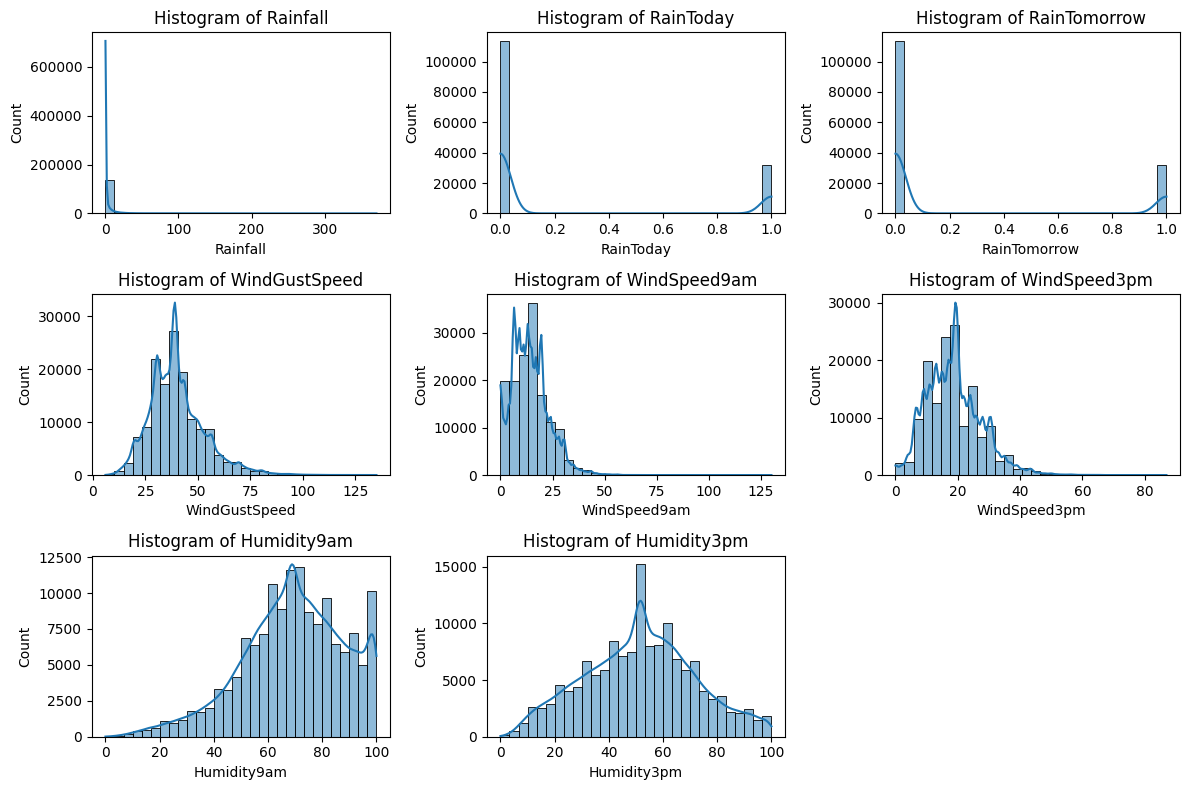

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns
numeric_cols = ['Rainfall', 'RainToday', 'RainTomorrow', 'WindGustSpeed',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

df['Rainfall'] = np.log1p(df['Rainfall'])
df['WindGustSpeed'] = np.sqrt(df['WindGustSpeed'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['MinTemp', 'MaxTemp', 'Temp3pm']] = scaler.fit_transform(df[['MinTemp', 'MaxTemp', 'Temp3pm']])

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(df[numeric_cols].skew())

Location         0.011233
MinTemp          0.083192
MaxTemp          0.268499
Rainfall         1.485575
WindGustDir     -0.152611
WindGustSpeed   -0.195863
WindDir9am       0.333181
WindDir3pm       0.001562
WindSpeed9am     0.770364
WindSpeed3pm     0.605999
Humidity9am     -0.511110
Humidity3pm     -0.050782
Pressure9am     -0.004452
Pressure3pm      0.010529
Temp9am          0.126447
Temp3pm          0.308310
RainToday        2.898006
Year            -0.001299
Month            0.030148
Day              0.009111
RainTomorrow     0.000000
dtype: float64


In [ ]:
df['RainToday'] = np.log1p(df['RainToday'])

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(df[numeric_cols].skew())

Location         0.011233
MinTemp          0.083192
MaxTemp          0.268499
Rainfall         1.485575
WindGustDir     -0.152611
WindGustSpeed   -0.195863
WindDir9am       0.333181
WindDir3pm       0.001562
WindSpeed9am     0.770364
WindSpeed3pm     0.605999
Humidity9am     -0.511110
Humidity3pm     -0.050782
Pressure9am     -0.004452
Pressure3pm      0.010529
Temp9am          0.126447
Temp3pm          0.308310
RainToday        2.808214
Year            -0.001299
Month            0.030148
Day              0.009111
RainTomorrow     0.000000
dtype: float64


In [ ]:
df.shape

(202266, 21)

## outliers

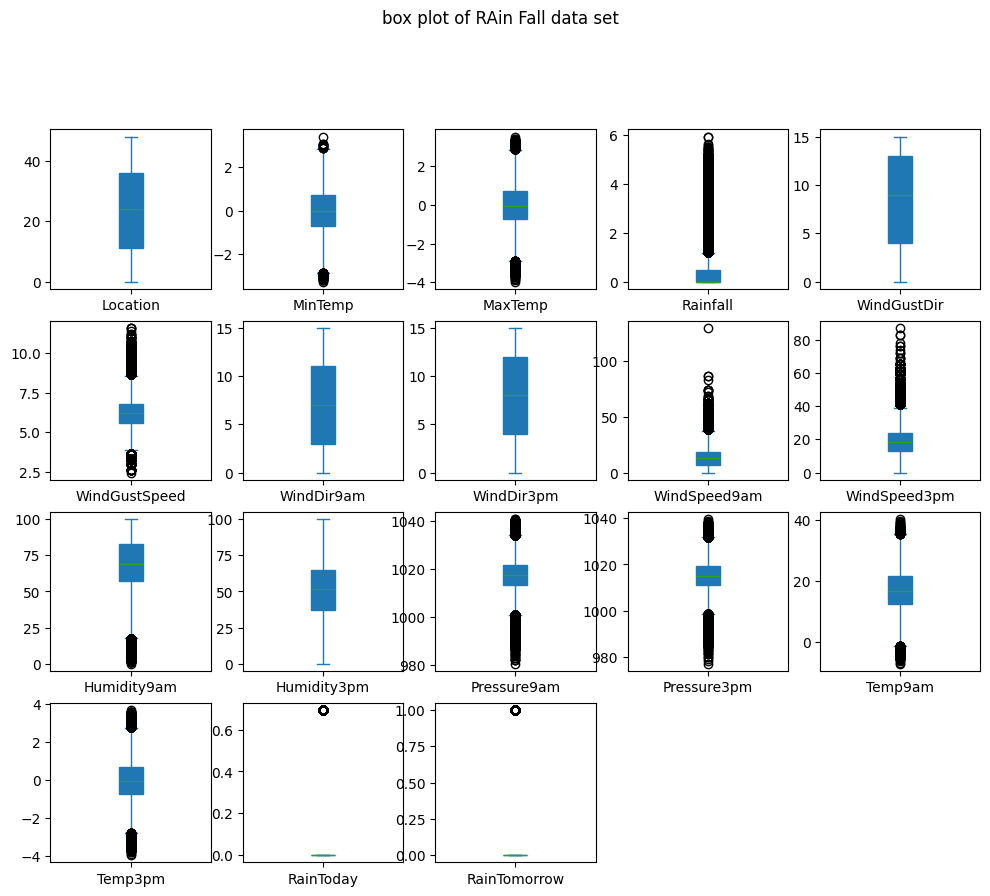

In [ ]:
df.plot(kind="box",subplots=True,vert=True,layout=(5,5),figsize=(12,12),patch_artist=True)
plt.suptitle("box plot of RAin Fall data set")
plt.show()

In [ ]:
import pandas as pd

def count_high_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        high_outliers = df[df[column] > upper_bound]
        outlier_counts[column] = len(high_outliers)
    return outlier_counts

# Count only high outliers
high_outlier_counts = count_high_outliers(df)

# Print outlier count per column
print("High outlier counts per numerical column:")
for column, count in high_outlier_counts.items():
    print(f"{column}: {count}")


High outlier counts per numerical column:
Location: 0
MinTemp: 11
MaxTemp: 204
Rainfall: 24584
WindGustDir: 0
WindGustSpeed: 2555
WindDir9am: 0
WindDir3pm: 0
WindSpeed9am: 1817
WindSpeed3pm: 2523
Humidity9am: 0
Humidity3pm: 0
Pressure9am: 1165
Pressure3pm: 1173
Temp9am: 104
Temp3pm: 536
RainToday: 31880
RainTomorrow: 31877


In [ ]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers_iqr(df, 'Rainfall')


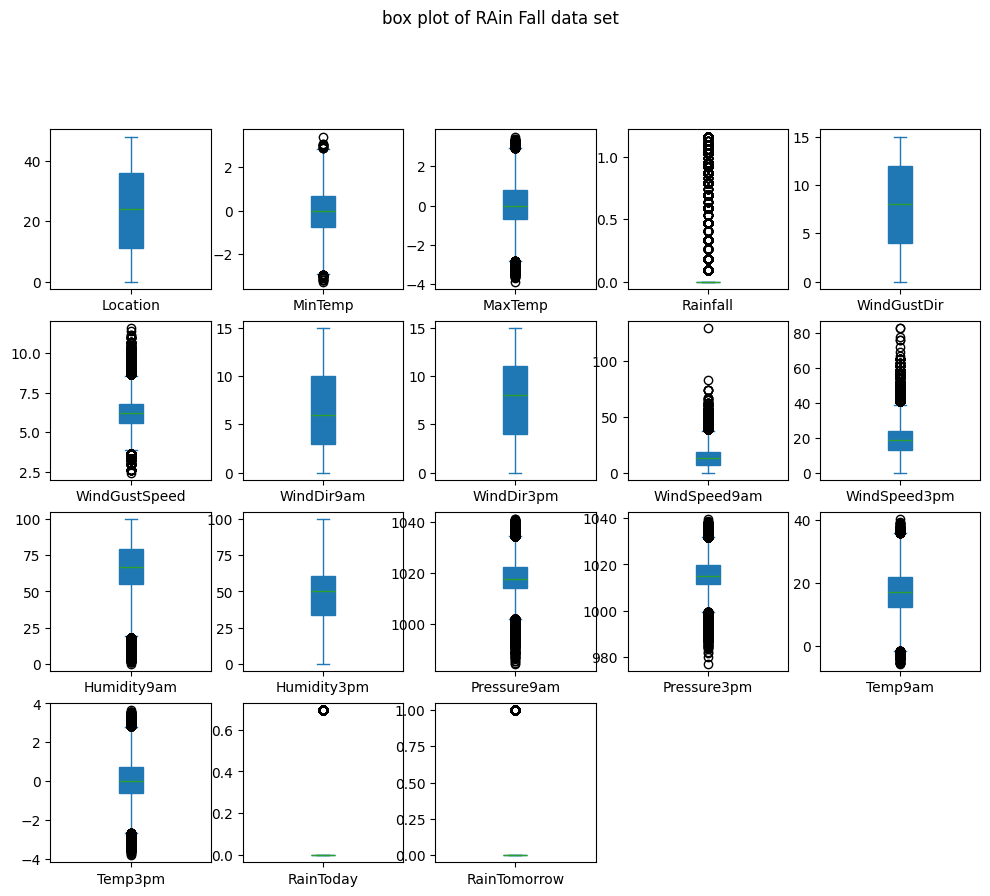

In [ ]:
df.plot(kind="box",subplots=True,vert=True,layout=(5,5),figsize=(12,12),patch_artist=True)
plt.suptitle("box plot of RAin Fall data set")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120876 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           120876 non-null  datetime64[ns]
 1   Location       120876 non-null  int64         
 2   MinTemp        120876 non-null  float64       
 3   MaxTemp        120876 non-null  float64       
 4   Rainfall       120876 non-null  float64       
 5   WindGustDir    120876 non-null  int64         
 6   WindGustSpeed  120876 non-null  float64       
 7   WindDir9am     120876 non-null  int64         
 8   WindDir3pm     120876 non-null  int64         
 9   WindSpeed9am   120876 non-null  float64       
 10  WindSpeed3pm   120876 non-null  float64       
 11  Humidity9am    120876 non-null  float64       
 12  Humidity3pm    120876 non-null  float64       
 13  Pressure9am    120876 non-null  float64       
 14  Pressure3pm    120876 non-null  float64       
 15  Temp9

In [ ]:
df.shape

(120876, 19)

##Feature engineering


In [ ]:
# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


print(df[['Date', 'Year', 'Month', 'Day']].head())

        Date  Year  Month  Day
0 2008-12-01  2008     12    1
1 2008-12-02  2008     12    2
2 2008-12-03  2008     12    3
3 2008-12-04  2008     12    4
4 2008-12-05  2008     12    5


<ipython-input-55-e2a23c2eb5c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-55-e2a23c2eb5c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-55-e2a23c2eb5c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
df.drop('Date', axis=1,inplace=True)

<ipython-input-56-b420afd5ec7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Date', axis=1,inplace=True)


# Oversampling


<ipython-input-57-1fb9d4f34ecf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RainTomorrow",data=df,palette="cool")


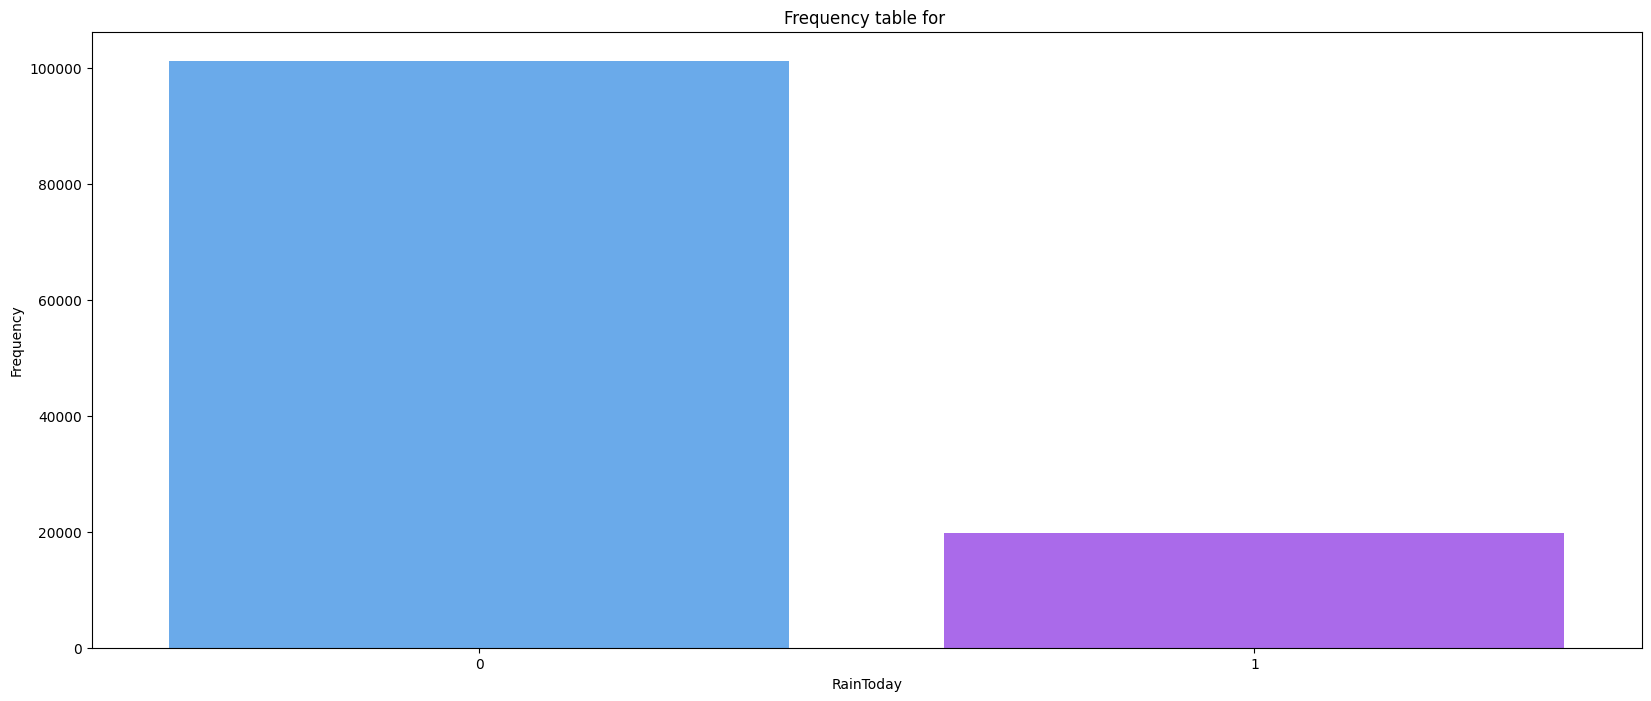

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x="RainTomorrow",data=df,palette="cool")
plt.title("Frequency table for ")
plt.xlabel("RainToday")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd


In [ ]:

# Separating features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

y = y.astype(int)


# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['RainTomorrow'])], axis=1)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({0: 101133, 1: 101133})


<ipython-input-60-1fb9d4f34ecf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RainTomorrow",data=df,palette="cool")


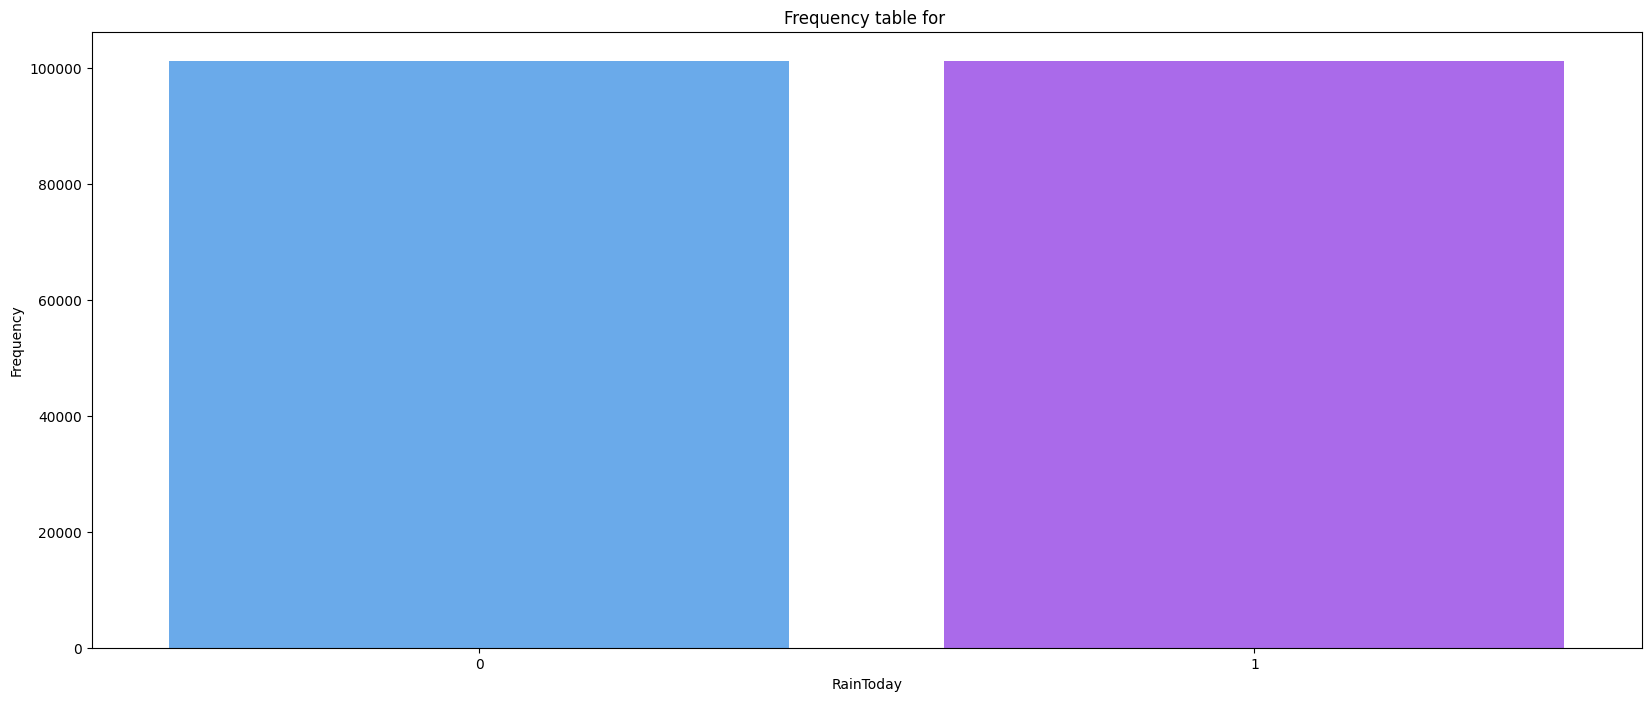

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x="RainTomorrow",data=df,palette="cool")
plt.title("Frequency table for ")
plt.xlabel("RainToday")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [ ]:
# from sklearn.decomposition import PCA

# # Assuming 'X_resampled' contains your features after SMOTE
# X = df.drop(columns=['RainTomorrow'])
# y = df['RainTomorrow']

# # Initialize PCA with the desired number of components
# pca = PCA(n_components=2)  # Reduce to 2 principal components

# # Fit and transform the data
# X_pca = pca.fit_transform(X)

# # Print the explained variance ratio
# print(pca.explained_variance_ratio_)

# # For visualization:
# import matplotlib.pyplot as plt

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("PCA Visualization")
# plt.show()


# Model Building


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# x y split
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# model algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# Import mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error, r2_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7251
Precision: 0.7339
Recall: 0.7065
F1 Score: 0.7199
ROC-AUC Score: 0.8053
Confusion Matrix:
[[15045  5182]
 [ 5937 14290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     20227
           1       0.73      0.71      0.72     20227

    accuracy                           0.73     40454
   macro avg       0.73      0.73      0.73     40454
weighted avg       0.73      0.73      0.73     40454



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_y_proba)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")
print(classification_report(y_test, rf_y_pred))


# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_y_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_y_proba)

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")
print(f"ROC-AUC Score: {xgb_roc_auc:.4f}")
print(classification_report(y_test, xgb_y_pred))


Random Forest Metrics:
Accuracy: 0.9213
Precision: 0.9265
Recall: 0.9152
F1 Score: 0.9208
ROC-AUC Score: 0.9768
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     20227
           1       0.93      0.92      0.92     20227

    accuracy                           0.92     40454
   macro avg       0.92      0.92      0.92     40454
weighted avg       0.92      0.92      0.92     40454


XGBoost Metrics:
Accuracy: 0.9175
Precision: 0.9490
Recall: 0.8824
F1 Score: 0.9145
ROC-AUC Score: 0.9709
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     20227
           1       0.95      0.88      0.91     20227

    accuracy                           0.92     40454
   macro avg       0.92      0.92      0.92     40454
weighted avg       0.92      0.92      0.92     40454



In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_y_proba = knn_model.predict_proba(X_test)[:, 1]
knn_roc_auc = roc_auc_score(y_test, knn_y_proba)


print("\nK-Nearest Neighbors Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")
print(f"ROC-AUC Score: {knn_roc_auc:.4f}")
print(classification_report(y_test, knn_y_pred))




K-Nearest Neighbors Metrics:
Accuracy: 0.8621
Precision: 0.7921
Recall: 0.9820
F1 Score: 0.8769
ROC-AUC Score: 0.9449
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     20227
           1       0.79      0.98      0.88     20227

    accuracy                           0.86     40454
   macro avg       0.88      0.86      0.86     40454
weighted avg       0.88      0.86      0.86     40454



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/database.csv')

In [3]:
df.tail()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
46180,DR-4301,Disaster,02/14/2017,CA,Sutter County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes
46181,DR-4301,Disaster,02/14/2017,CA,Trinity County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes
46182,DR-4301,Disaster,02/14/2017,CA,Tuolumne County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes
46183,DR-4301,Disaster,02/14/2017,CA,Yolo County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes
46184,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes


In [4]:
isnull().sum()

NameError: name 'isnull' is not defined